# Основные концепции Machine Learning. Домашняя работа

In [ ]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
### Здесь требуется загрузить датасет phones.csv ###

In [59]:
dat = pd.read_csv('phones.csv')
print(dat.head())
print(dat.info)

   disk       os  price  year
0    64  Android   7256  2016
1   128  Android   7623  2015
2    64  Android   1916  2010
3   512      iOS  15045  2017
4    16  Android   4478  2013
<bound method DataFrame.info of     disk       os  price  year
0     64  Android   7256  2016
1    128  Android   7623  2015
2     64  Android   1916  2010
3    512      iOS  15045  2017
4     16  Android   4478  2013
..   ...      ...    ...   ...
95   512      iOS   8398  2011
96    64  Android   7197  2016
97    32  Android   5694  2014
98    32  Android   7589  2016
99   256      iOS   9533  2014

[100 rows x 4 columns]>


In [ ]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

Задание 1: обучить модель регрессии

In [81]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = dat[['disk', 'year']]
y = dat['price']

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [82]:
reg = LinearRegression().fit(X, y)
print(reg.intercept_,reg.coef_)
a = reg.intercept_
b = reg.coef_

-2051913.7442219162 [  13.57877662 1021.27616528]


In [71]:
d1, d2 = list(), list()
for x in np.linspace(min(dat["disk"]), max(dat["disk"]), 100):
    for y in np.linspace(min(dat["year"]), max(dat["year"]), 10):
        d1.append(x)
        d2.append(y)
#print(d1)
d1 = np.array(d1).reshape(-1, 1)
#print(d1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

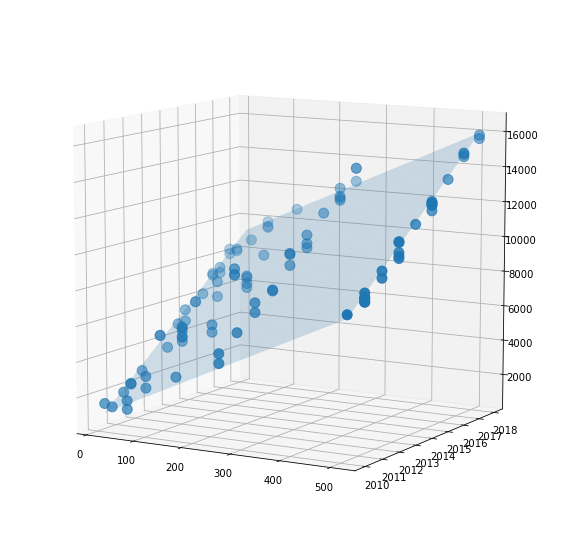

In [69]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию
ax.scatter(dat['disk'], dat['year'], dat['price'], s=100)
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)
ax.elev = 10
plt.show()

Задание 2: обучить модель классификации

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [78]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = dat[['price', 'year', 'disk']]
y = dat['os']
cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))

|--- feature_2 <= 192.00
|   |--- class: Android
|--- feature_2 >  192.00
|   |--- class: iOS



In [86]:
X = dat[['price', 'year']]
y = dat['os']
cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))

|--- feature_0 <= 7660.50
|   |--- feature_1 <= 2012.50
|   |   |--- feature_0 <= 3855.50
|   |   |   |--- class: Android
|   |   |--- feature_0 >  3855.50
|   |   |   |--- class: iOS
|   |--- feature_1 >  2012.50
|   |   |--- class: Android
|--- feature_0 >  7660.50
|   |--- feature_1 <= 2015.50
|   |   |--- class: iOS
|   |--- feature_1 >  2015.50
|   |   |--- feature_0 <= 11017.00
|   |   |   |--- class: Android
|   |   |--- feature_0 >  11017.00
|   |   |   |--- class: iOS



Задание 2.1: Выведите предсказания для регрессии и классификации отдельными столбцами в исходном датасете и визуально сравните

Compared os and predicted os. Are they equal? True


,disk,os,price,year,regression,regression_compare,classification
0,64,Android,7256,2016,7848.046694,8.159409,Android
1,128,Android,7623,2015,7695.812233,0.955165,Android
2,64,Android,1916,2010,1720.389703,-10.209306,Android
3,512,iOS,15045,2017,14952.614784,-0.614059,iOS
4,16,Android,4478,2013,4132.436921,-7.716907,Android


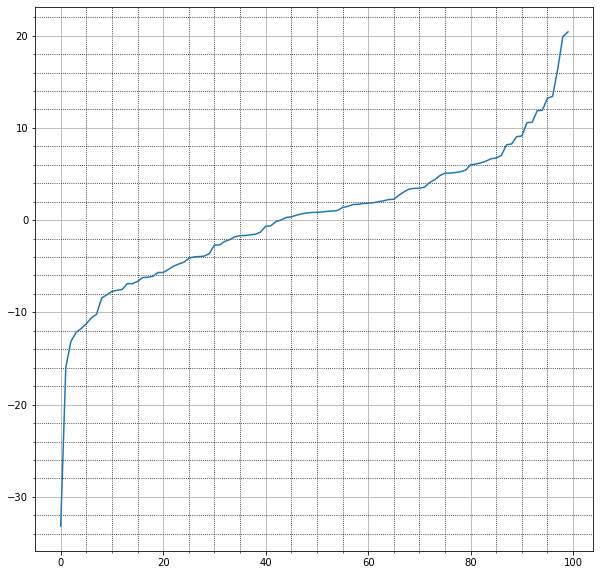

In [112]:
#dat['regression'] = a + b[0]*dat['disk'] + b[1]*dat['year']
#dat['regression_compare'] = (dat['regression'] - dat['price']) / dat['price'] * 100
#dat['classification'] = cl.predict(dat[['price', 'year']])

dat.sort_values(by=['regression_compare']).head()
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.grid()
ax.minorticks_on()
ax.grid(which='minor', color = 'k', linestyle = ':')
ax.plot(dat.index, dat.sort_values(by=['regression_compare'])['regression_compare'])
print(f"Compared os and predicted os. Are they equal? {dat['os'].equals(dat['classification'])}")
dat.head()

Задание 3: обучить модель кластеризации

In [ ]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# X = 

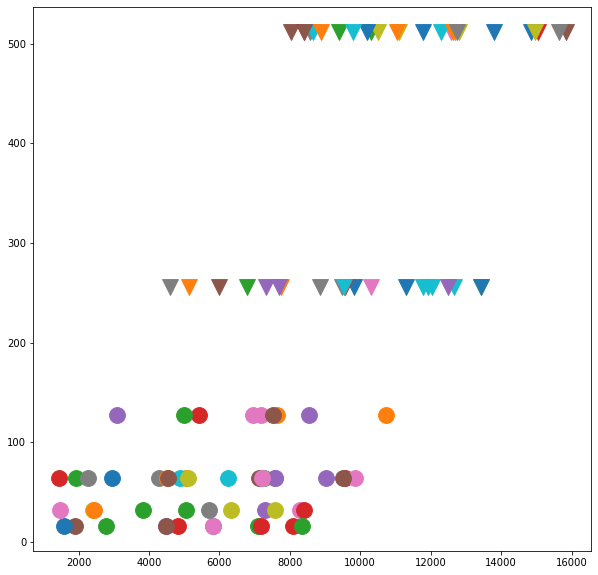

In [48]:
fig = plt.figure(figsize=(10, 10))
markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(dat.price, dat.disk, dat.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [49]:
from sklearn.cluster import KMeans
X = dat[["price", "disk"]]

In [52]:
clust = KMeans(n_clusters=2).fit(X)
[c1, c2] = clust.cluster_centers_
print(c1, c2)

[5736.18644068  110.10169492] [11529.70731707   371.51219512]


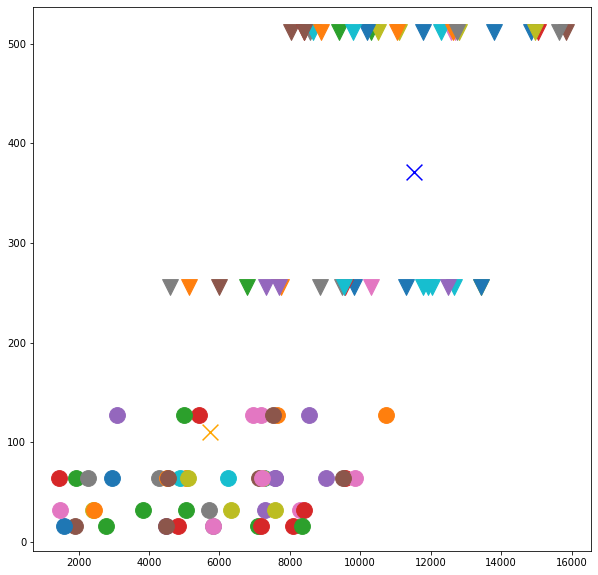

In [57]:
fig = plt.figure(figsize=(10, 10))
markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(dat.price, dat.disk, dat.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])
plt.scatter(c1[0], c1[1], s=250, marker="x", c="orange")
plt.scatter(c2[0], c2[1], s=250, marker="x", c="blue")